#### PROBLEM 5: DBSCAN on toy-neighborhood data
You are to cluster, and visualize, a small dataset using DBSCAN epsilon = 7.5, MinPts = 3). You have been provided a file, dbscan.csv, that has the following columns for each point in the dataset:
- cluster originally empty, provided for your convenience pt a unique id for each data point
- x point x-coordinate
- y point y-coordinate
- num neighbors number of neighbors, according to the coordinates above neighbors the id’s of all neighbors within

As you can see, a tedious O(n^2) portion of the work has been done for you. Your job is to execute, point-by-point, the DBSCAN algorithm, logging your work.

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

Text(0.5, 1.0, 'Scattered data')

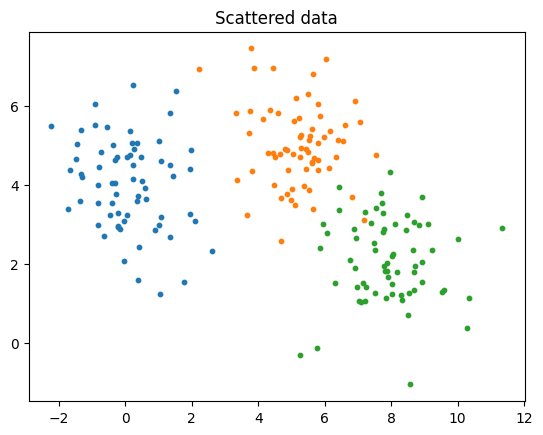

In [2]:
centers = [(0, 4), (5, 5) , (8,2)]
cluster_std = [1.2, 1, 1.1]

X, y= make_blobs(n_samples=200, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)

plt.scatter(X[y == 0, 0], X[y == 0, 1], s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=10, label="Cluster2")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=10, label="Cluster3")
plt.title("Scattered data")

In [3]:
def check_core_point(eps,minPts, df, index):
    x, y = df.iloc[index]['x']  ,  df.iloc[index]['y']
    temp =  df[((np.abs(x - df['x']) <= eps) & (np.abs(y - df['y']) <= eps)) & (df.index != index)]
    
    if len(temp) >= minPts:
        return (temp.index , 1)
    
    elif (len(temp) < minPts) and len(temp) > 0:
        return (temp.index , 2)
    
    elif len(temp) == 0:
        return (temp.index , 3)

In [4]:
def dbscan(eps, minPts, df):
    
    #initiating cluster number
    cluster_num = 0

    q = set()
    unvisited = list(df.index)
    clusters = []
    
    
    while (len(unvisited) > 0): #run until all points have been visited

        #identifier for first point of a cluster
        first_point = True
        
        #choose a random unvisited point
        q.add(random.choice(unvisited))
        
        while len(q) > 0:
            
            pop = q.pop()
            unvisited.remove(pop)
            
            neighbor_ind, point_type = check_core_point(eps, minPts, df, pop)
            
            #dealing with an edge case
            if point_type == 2 and first_point:
                
                clusters.append((pop, -1))
                for ind in neighbor_ind:
                    clusters.append((ind, -1))

                unvisited = [element for element in unvisited if element not in neighbor_ind]
                continue

            first_point = False
            
            #CORE POINT
            if point_type == 1:
                clusters.append((pop,cluster_num))
                neighbor_ind = set(neighbor_ind) & set(unvisited)
                q.update(neighbor_ind)

            #BORDER POINT
            elif point_type == 2:
                clusters.append((pop,cluster_num))
            
            #OUTLIER
            elif point_type == 3:
                clusters.append((pop, -1))
                
        if not first_point:
            cluster_num += 1
        
    return clusters

Text(0, 0.5, 'Y')

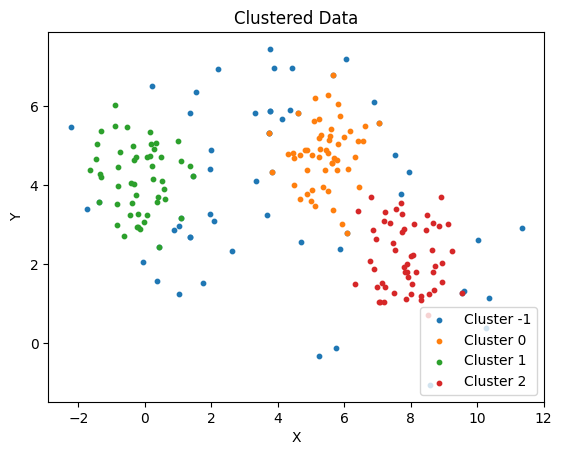

In [5]:
#radius of the circle defined as 0.6
eps = 0.6
#minimum neighbouring points set to 3
minPts = 5

data = pd.DataFrame(X, columns = ["X", "Y"] )
data.rename(columns={'X': 'x', 'Y':'y'}, inplace = True)

clustered = dbscan(eps, minPts, data)

ind , cluster = list(zip(*clustered))

cluster_df = pd.DataFrame(clustered, columns = ["ind", "cluster"])


for clust in np.unique(cluster):
    plt.scatter(X[cluster_df["ind"][cluster_df["cluster"] == clust].values, 0], X[cluster_df["ind"][cluster_df["cluster"] == clust].values, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)], loc ="lower right")
plt.title('Clustered Data')
plt.xlabel('X')
plt.ylabel('Y')

======================================

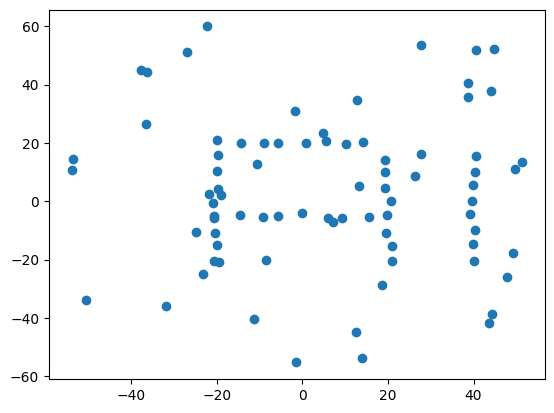

In [6]:
data = pd.read_csv(r'dbscan.csv')
df_toy = pd.DataFrame(data, columns=['pt', 'x', 'y', 'num_neighbors', 'neighbors'])

x_y = pd.DataFrame(df_toy, columns=['x', 'y'])

x = x_y['x']
y = x_y['y']

plt.scatter(x, y)
plt.show()


# print(df['x'])

[-1  0  2  6]


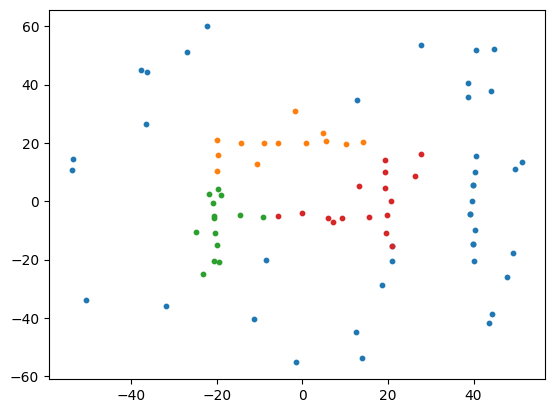

In [9]:
#radius of the circle defined as 0.6
eps = 7.5
#minimum neighbouring points set to 3
minPts = 3


clustered = dbscan(eps, minPts, x_y)

ind , cluster = list(zip(*clustered))

print(np.unique(cluster))
cluster_df = pd.DataFrame(clustered, columns = ["ind", "cluster"])

raw_xy = x_y.to_numpy()

for clust in np.unique(cluster):
    plt.scatter(raw_xy[cluster_df["ind"][cluster_df["cluster"] == clust].values, 0], raw_xy[cluster_df["ind"][cluster_df["cluster"] == clust].values, 1], s=10, label=f"Cluster{clust}")


